In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Shape of the dataset
data.shape

(25, 2)

In [4]:
#Info of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Datatypes
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
#Attributes
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [9]:
#Checking for Duplicate values in the dataset
data.duplicated().sum()

0

In [10]:
#Checking for Null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

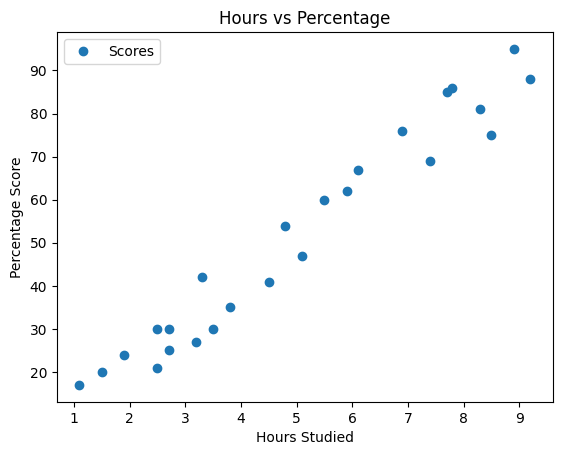

In [11]:
#Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show('block=false')

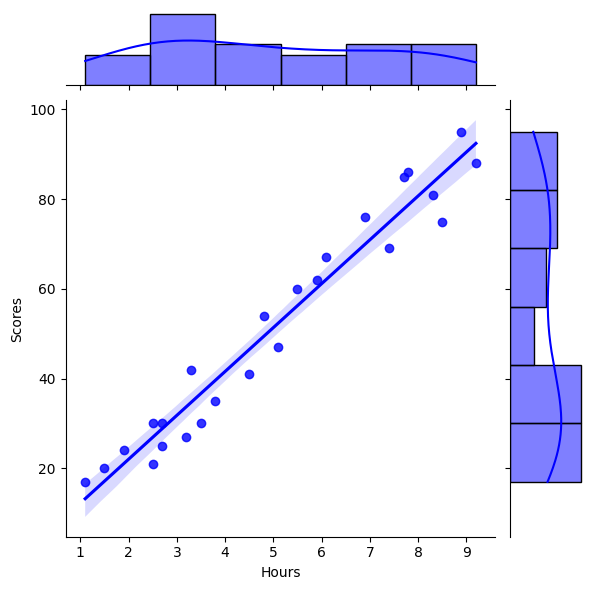

In [12]:
sns.jointplot(data = data, x = 'Hours', y = 'Scores', kind = 'reg', color='b')

In [13]:
X = data.iloc[:, :-1].values   #Attributes
y = data.iloc[:, 1].values     #Labels

print('Data Preparation done Successfully')

Data Preparation done Successfully


In [14]:
#Spliting our data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training is Complete")

Training is Complete


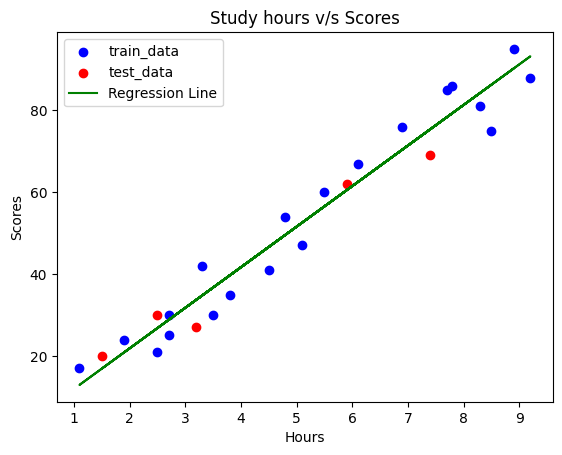

In [16]:
#Plotting the Regression line

line = lr.coef_*X+lr.intercept_

#Plotting for the test data first
plt.scatter(X_train, y_train, label="train_data", color = "b")
plt.scatter(X_test,y_test, label="test_data", color = "r")
plt.title("Study hours v/s Scores")
plt.plot(X, line, color='g', label = 'Regression Line');
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [17]:
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
#Now comparing Actual v/s Predicted 
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred, 'Varience':y_test-y_pred})
df

,Actual,Predicted,Varience
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


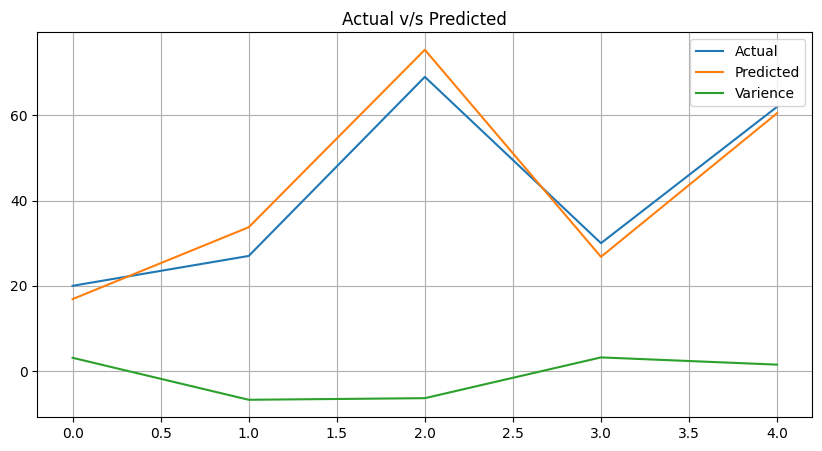

In [19]:
df.plot(kind = 'line', figsize = (10,5), title='Actual v/s Predicted')
plt.grid()
plt.show()

In [20]:
#Testing for Accuracy of Training and Testing sets

print("Training Accuracy: ",lr.score(X_train,y_train))
print("Testing Accuracy: ",lr.score(X_test,y_test))

Training Accuracy:  0.9515510725211552
Testing Accuracy:  0.9454906892105355


In [21]:
hours = 9.25
hr = np.array([hours])
hr = hr.reshape(-1,1)
pred = lr.predict(hr)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737535


In [22]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2scpre: ", round(r2_score(y_test, y_pred)*100,3))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.598769307217406
R2scpre:  94.549
Root Mean Squared Error:  4.647447612100367
